# Analyzing Hacker News.com Posts
This small project analyzes the activity in the comments section of posts taken from the [Hacker News](https://news.ycombinator.com/) website. The dataset used here however was downloaded from [kaggle.com](https://www.kaggle.com/hacker-news/hacker-news-posts). This dataset gathers posts from the year 2016, up to September 26 of that year. It organizes the data in seven columns, described as follows:

- 'title': title of the post (self explanatory)

- 'url': the url of the item being linked to

- 'num_points': the number of upvotes the post received

- 'num_comments': the number of comments the post received

- 'author': the name of the account that made the post

- 'created_at': the date and time the post was made (the time zone is Eastern Time in the US)

In [1]:
import pandas as pd
import datetime as dt

df = pd.read_csv('HN_posts_year_to_Sep_26_2016.csv')
print(df.shape)
df.head()

(293119, 7)


,id,title,url,num_points,num_comments,author,created_at
0,12579008,You have two days to comment if you want stem ...,http://www.regulations.gov/document?D=FDA-2015...,1,0,altstar,9/26/2016 3:26
1,12579005,SQLAR the SQLite Archiver,https://www.sqlite.org/sqlar/doc/trunk/README.md,1,0,blacksqr,9/26/2016 3:24
2,12578997,What if we just printed a flatscreen televisio...,https://medium.com/vanmoof/our-secrets-out-f21...,1,0,pavel_lishin,9/26/2016 3:19
3,12578989,algorithmic music,http://cacm.acm.org/magazines/2011/7/109891-al...,1,0,poindontcare,9/26/2016 3:16
4,12578979,How the Data Vault Enables the Next-Gen Data W...,https://www.talend.com/blog/2016/05/12/talend-...,1,0,markgainor1,9/26/2016 3:14


## Choosing a path to explore:

Looking through the dataset, two post 'categories' stand out: posts that start with an 'Ask HN' string and posts that start with an 'Show HN' string. 'Ask HN' stands for 'Ask Hacker News', and this are posts from users who are asking the HN community for help. 'Show HN' are posts from users who want to promote their work and get feedback through comments and points. 

In [2]:
#Filter 'ask hn' and 'show hn' posts
#'ask hn' are questions from users, 'show hn' are projects being posted
ask_posts = df['title'].str.lower().str.startswith('ask hn')
show_posts = df['title'].str.lower().str.startswith('show hn')
ask_show_df = df[ask_posts | show_posts ]
print(ask_show_df.shape)
ask_show_df.head()

(19297, 7)


,id,title,url,num_points,num_comments,author,created_at
10,12578908,Ask HN: What TLD do you use for local developm...,NaN,4,7,Sevrene,9/26/2016 2:53
42,12578522,Ask HN: How do you pass on your work when you ...,NaN,6,3,PascLeRasc,9/26/2016 1:17
52,12578335,Show HN: Finding puns computationally,http://puns.samueltaylor.org/,2,0,saamm,9/26/2016 0:36
58,12578182,Show HN: A simple library for complicated anim...,https://christinecha.github.io/choreographer-js/,1,0,christinecha,9/26/2016 0:01
64,12578098,Show HN: WebGL visualization of DNA sequences,http://grondilu.github.io/dna.html,1,0,grondilu,9/25/2016 23:44


## Exploring the Popularity of Ask HN and Show HN posts

Social media on the internet is about gaining 'followers' and becoming viral. In the case of Hacker News, the popularity of posts could be measured given the features found in the data. After filtering the Ask HN and the Show HN posts, it would be suitable to compare their level of importance by digging into the 'num_points' and 'num_comments' columns. Presenting an average of the number of comments and number of points this posts are given is a way of getting an answer about how popular they are.

In [3]:
#Create a new column named 'Category' which labels posts as Ask HN or Show HN
#Create dataframe of Ask HN only posts with the new column:
ask_df = ask_show_df[ask_show_df['title']
                             .str.lower()
                             .str.startswith('ask hn')].assign(Category='Ask HN')
#Create dataframe of Show HN only posts with the new column:
show_df = ask_show_df[ask_show_df['title']
                             .str.lower()
                             .str.startswith('show hn')].assign(Category='Show HN')
#Join the two dataframes
categorized_df = ask_df.append(show_df)
#Group by Category and produce mean:
mean = categorized_df.groupby('Category').mean()
print('Average comments:\n\n',mean['num_comments'])

Average comments:

 Category
Ask HN     10.393478
Show HN     4.886100
Name: num_comments, dtype: float64


In [4]:
#From here on plots will be created to help visualize the results.
#Each plot is going to be numerated in the title using the following class:
class GraphTitle():
    '''This class enumerates all graphs 
    created from first to last (Graph 1., Graph 2.,... Graph N.)
    It's instatiated in the title() method of each graph.'''
    nextNumber = 1
    def __init__(self,title): 
        '''title: custom title for the graph '''
        self.name = 'Graph'
        self.title = title
        self.Number = GraphTitle.nextNumber
        GraphTitle.nextNumber += 1
    def getTitle(self):
        '''Returns a string'''
        return self.name + ' ' + str(self.Number) + '. ' + self.title
#The object GraphTitle will be instatiated in the title method of each graph, 
#the getTitle() method will be called and it will produce titles numbered in consecutive order

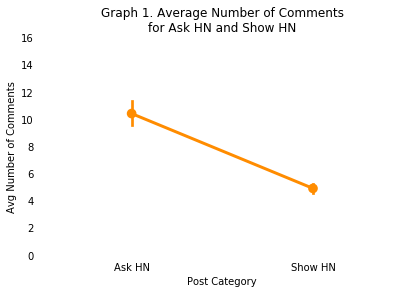

In [5]:
#Ignore a FutureWarning that pops up
import warnings
warnings.filterwarnings('ignore')

#Plotting the averages using a point plot:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
%matplotlib inline

plt.figure(figsize=(6.5,4))
ax = sns.pointplot(x='Category', 
                   y='num_comments',
                   color='#ff8c00',
                   data=categorized_df,scale=1.1)
sns.despine(left=True,bottom=True)
ax.axes.set_ylim(0,16)
ax.xaxis.set_ticks_position('none') 
ax.yaxis.set_ticks_position('none')
ax.set_title(GraphTitle('Average Number of Comments\nfor Ask HN and Show HN').getTitle())
ax.set(xlabel='Post Category', ylabel='Avg Number of Comments')
plt.show()


## Reading the averages
The average values show that there are more comments on average on 'Asking' posts than on 'Showing' posts. One reason could be that people like problem solving and by commenting in an ask post they are actually solving someone else's problem. In the showing posts, people might be solving a problem but it's harder to realize who's problem are they solving. The next step is to keep analyzing the Ask HN posts, by asking, for example, which hour of the day has the most average posts.

In [6]:
#Find the hour of the day with the most comments for Ask HN posts:

#Convert 'created_at' column into datetime format
ask_df['created_at'] = pd.to_datetime(ask_df['created_at'],format='%m/%d/%Y %H:%M')
#Extract just the hour from the 'created_at' column, so a grouping by hour can be done
hour = ask_df['created_at'].dt.hour
#'Hour' column created to group by that column, last map() function ignores seconds
ask_df['Hour'] = pd.to_datetime(hour,format='%H').dt.time.map(lambda t: 
                                                              t.strftime('%H:%M'))
#Group by hour
avg_by_hour = ask_df.groupby('Hour').mean().sort_values(by='num_comments',ascending=False)
print('Average comments per hour (Eastern Time):\n\n',
      avg_by_hour['num_comments'].head().map('average {:,.2f} comments per post.'.format))

Average comments per hour (Eastern Time):

 Hour
15:00    average 28.68 comments per post.
13:00    average 16.32 comments per post.
12:00    average 12.38 comments per post.
02:00    average 11.14 comments per post.
10:00    average 10.68 comments per post.
Name: num_comments, dtype: object


## Post Creation Hours with highest average comments
The hour a post was created receiving the highest average of comments is 15:00 Eastern Time. By looking at this information, an Ask HN post has a higher chance to get a comment at this hour. If your time zone differs from the one used in the dataset, the following code will help:

In [7]:
avg_by_local_hour = avg_by_hour.reset_index()

#For a user in Nairobi, Kenya, the hours with the highest average comments would differ:
#Change 'Hour' column to 'Nairobi_Time'
avg_by_local_hour.rename(columns={'Hour':'Nairobi_Time'},inplace=True)

local_UTC = 3 #Nairobi has a time of UTC+3

#Convert values in avg_by_local_hour['Hour'] to datetime objects:
avg_by_local_hour['Nairobi_Time'] = pd.to_datetime(avg_by_local_hour['Nairobi_Time'])
#Eastern time is UTC-5, so data values will get converted back to UTC by adding 5:
avg_by_local_hour['Nairobi_Time'] = avg_by_local_hour['Nairobi_Time']+dt.timedelta(hours=5)
#Now add local_UTC to the values:
avg_by_local_hour['Nairobi_Time'] = avg_by_local_hour['Nairobi_Time']+dt.timedelta(hours=local_UTC)

#Change format of 'Nairobi_Hour' to show only time and ignore seconds
Nai_hour = avg_by_local_hour['Nairobi_Time'].dt.hour
avg_by_local_hour['Nairobi_Time'] = pd.to_datetime(Nai_hour,format='%H').dt.time.map(lambda t: 
                                                              t.strftime('%H:%M'))
#Set index to be the hour:
avg_by_local_hour.set_index('Nairobi_Time',inplace=True)
print('Average coments per hour (Nairobi Time):\n\n',
      avg_by_local_hour['num_comments'].head().map('average {:,.2f} comments per post.'.format))

Average coments per hour (Nairobi Time):

 Nairobi_Time
23:00    average 28.68 comments per post.
21:00    average 16.32 comments per post.
20:00    average 12.38 comments per post.
10:00    average 11.14 comments per post.
18:00    average 10.68 comments per post.
Name: num_comments, dtype: object


## Plot the post creation hours with highest comment average
Back to using Eastern Time, a comparison of the numbers of comments per hour is created below:

In [8]:
#Filter ask_df to show only the top 5 hours discovered above
ask_df_top_hrs = ask_df[ask_df['Hour'].isin(avg_by_hour['num_comments'].head().index)]
#Sort by column 'Hour'
ask_df_top_hrs = ask_df_top_hrs.sort_values(by='Hour')
#Display result
ask_df_top_hrs.head()

,id,title,url,num_points,num_comments,author,created_at,Category,Hour
10,12578908,Ask HN: What TLD do you use for local developm...,NaN,4,7,Sevrene,2016-09-26 02:53:00,Ask HN,02:00
160250,11193292,Ask HN: Favorite Email Client?,NaN,13,20,bmnews,2016-02-29 02:00:00,Ask HN,02:00
160750,11189581,Ask HN: What browser do you use for front-end ...,NaN,2,5,bikamonki,2016-02-28 02:50:00,Ask HN,02:00
27873,12324739,Ask HN: Were you fooled by the selective atten...,NaN,1,0,lawpoop,2016-08-20 02:04:00,Ask HN,02:00
160753,11189543,Ask HN: How do you get your private projects/r...,NaN,3,1,steve2048,2016-02-28 02:39:00,Ask HN,02:00


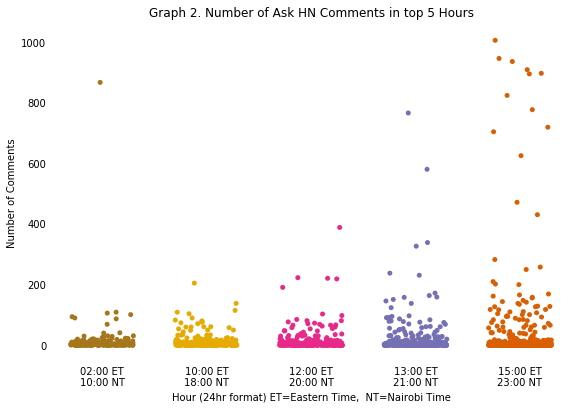

In [9]:
#Plot:
#First make a list of labels for the x axis to show both Eastern Time and Nairobi Time:
labels = []
#sort times 
Etimes = avg_by_hour['num_comments'].head().sort_index()
Ntimes = avg_by_local_hour['num_comments'].head().sort_index()
#append values to list
for h in range(len(avg_by_local_hour['num_comments'].head().index)):
    labels.append('{} ET\n{} NT'.format(Etimes.index[h],
                                        Ntimes.index[h]))
#Create plot
ax = sns.catplot(x='Hour', 
                   y='num_comments',
                   hue='Hour',
                   data=ask_df_top_hrs,
                   height=5.5,aspect=1.5,jitter=0.3,palette='Dark2_r')
sns.despine(left=True,bottom=True)
ax.set_axis_labels('Hour (24hr format) ET=Eastern Time,  NT=Nairobi Time','Number of Comments')
ax.set_xticklabels(labels) #pass the labels list with the two times
plt.title(GraphTitle('Number of Ask HN Comments in top 5 Hours').getTitle())
plt.tick_params(axis='both', which='both',length=0)
plt.show()


## The Points System

Now that the comments activity has been explored, it would be relevant to look into the Points column, 'num_points' of the dataset. A point in the Hacker News website works as a vote. The number of points in a post equals the number of users that voted for that post. The same work done in the 'num_comments' columns will be now done in this column,. That is, determine which category, 'Show HN' or 'Ask HN, receives more points on average and depending on the answer determine at what time the comments get more points.

In [10]:
#Use the 'categorized_df' dataframe created before, which already filtered the 'Ask HN' and 'Show HN' posts:
mean = categorized_df.groupby('Category').mean()
print('Average points:\n\n',mean['num_points'])

Average points:

 Category
Ask HN     11.311741
Show HN    14.843572
Name: num_points, dtype: float64


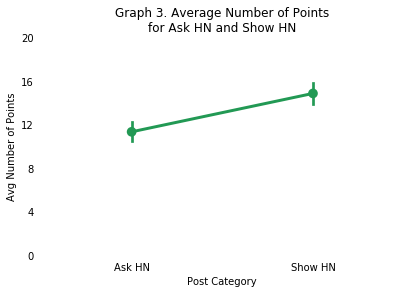

In [11]:
#Create a point plot to visualize the difference:
import matplotlib.ticker as ticker
%matplotlib inline

plt.figure(figsize=(6.5,4))
ax = sns.pointplot(x='Category', 
                   y='num_points',
                   color='#229954',
                   data=categorized_df,scale=1.1)
sns.despine(left=True,bottom=True)
ax.axes.set_ylim(0,20)
ax.xaxis.set_ticks_position('none') #Remove x axis ticks
ax.yaxis.set_ticks_position('none') #Remove y axis ticks
ax.yaxis.set_major_locator(ticker.MultipleLocator(4)) #Y axis intervals (step).
ax.set(xlabel='Post Category', ylabel='Avg Number of Points')
ax.set_title(GraphTitle('Average Number of Points\nfor Ask HN and Show HN').getTitle())
plt.show()

## 'Show HN' has a higher average of Points
Show HN posts get more points on average than Ask HN posts, opposite dynamic than when measuring the amount of comments. The next step is to keep analyzing the Show HN posts by finding out which hour of the day has the most average points.

In [12]:
#Find the hour of the day with the most points for Show HN posts:
#(The show_df dataframe was created at the begining of this project)

#Convert 'created_at' column into datetime format
show_df['created_at'] = pd.to_datetime(show_df['created_at'],format='%m/%d/%Y %H:%M')
#Extract just the hour from the 'created_at' column, so a grouping by hour can be done
hour = show_df['created_at'].dt.hour
#'Hour' column created to group by that column, last map() function ignores seconds
show_df['Hour'] = pd.to_datetime(hour,format='%H').dt.time.map(lambda t: 
                                                              t.strftime('%H:%M'))
#Group by hour
avgP_by_hour = show_df.groupby('Hour').mean().sort_values(by='num_points',ascending=False)
print('Average points per hour (Eastern Time):\n\n',
      avgP_by_hour['num_points'].head().map('average {:,.2f} points per post.'.format))

Average points per hour (Eastern Time):

 Hour
12:00    average 20.91 points per post.
11:00    average 19.26 points per post.
13:00    average 17.02 points per post.
19:00    average 16.06 points per post.
06:00    average 15.99 points per post.
Name: num_points, dtype: object


## Post Creation Hours with highest average of points
The hour a post was created receiving the highest average of points is 12:00 Eastern Time. A Show HN post has a higher chance to get more points at this hour. A plot showing the number of points for each of the top 5 hours is  helpful to compare times. The plot is shown in the next section.

## Plotting the Number of Points per Hour

In [13]:
#First create a new column to have the Nairobi Time already available:
show_df['Nairobi_Time'] = show_df['Hour']
#Convert the new column to datetime so the timedelta operation can be done
show_df['Nairobi_Time'] = pd.to_datetime(show_df['Nairobi_Time'])
#We know now that Nairobi Time equals Eastern Time + 8 hours
show_df['Nairobi_Time'] = show_df['Nairobi_Time']+dt.timedelta(hours=8)
#Format the Nairobi Time column to show just the hour and minutes as a string
Nai_hour = show_df['Nairobi_Time'].dt.hour
show_df['Nairobi_Time'] = pd.to_datetime(Nai_hour,format='%H').dt.time.map(lambda t: 
                                                              t.strftime('%H:%M'))
show_df.head(3)


,id,title,url,num_points,num_comments,author,created_at,Category,Hour,Nairobi_Time
52,12578335,Show HN: Finding puns computationally,http://puns.samueltaylor.org/,2,0,saamm,2016-09-26 00:36:00,Show HN,00:00,08:00
58,12578182,Show HN: A simple library for complicated anim...,https://christinecha.github.io/choreographer-js/,1,0,christinecha,2016-09-26 00:01:00,Show HN,00:00,08:00
64,12578098,Show HN: WebGL visualization of DNA sequences,http://grondilu.github.io/dna.html,1,0,grondilu,2016-09-25 23:44:00,Show HN,23:00,07:00


In [14]:
#Filter show_df to show only the top 5 hours discovered above
show_df_top_hrs = show_df[show_df['Hour'].isin(avgP_by_hour['num_points'].head().index)]
#Sort by column 'Hour'
show_df_top_hrs = show_df_top_hrs.sort_values(by='Hour')
#Display result
show_df_top_hrs.head(3)

,id,title,url,num_points,num_comments,author,created_at,Category,Hour,Nairobi_Time
233400,10613173,Show HN: RC-455 A WebAudio Synthesizer,http://barakchamo.github.io/rc455,35,20,BarakChamo,2015-11-23 06:24:00,Show HN,06:00,14:00
132131,11428264,Show HN: Module loader for chrome console,https://chrome.google.com/webstore/detail/r42-...,13,3,chadscira,2016-04-05 06:23:00,Show HN,06:00,14:00
44905,12178635,Show HN: AtGet.rb v3.0 Apple Trailers Downloader,https://github.com/tuxy/ruby/blob/master/atget.rb,1,0,tux,2016-07-28 06:05:00,Show HN,06:00,14:00


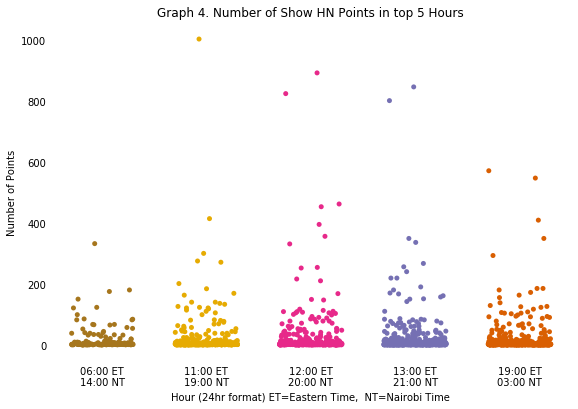

In [15]:
#Plot:
#First make a list of labels for the x axis to show both Eastern Time and Nairobi Time:
labels = []
#sort times 
Etimes = show_df_top_hrs['Hour'].unique()
Ntimes = show_df_top_hrs['Nairobi_Time'].unique()
#append values to list
for h in range(len(avg_by_local_hour['num_comments'].head().index)):
    labels.append('{} ET\n{} NT'.format(Etimes[h],
                                        Ntimes[h]))
#Create plot
ax = sns.catplot(x='Hour', 
                   y='num_points',
                   hue='Hour',
                   data=show_df_top_hrs,
                   height=5.5,aspect=1.5,jitter=0.3,palette='Dark2_r')
sns.despine(left=True,bottom=True)
ax.set_axis_labels('Hour (24hr format) ET=Eastern Time,  NT=Nairobi Time','Number of Points')
ax.set_xticklabels(labels) #pass the labels list with the two times
plt.title(GraphTitle('Number of Show HN Points in top 5 Hours').getTitle())
plt.tick_params(axis='both', which='both',length=0)
plt.show()

Graph 4 above shows the hour of highest average points, 12:00 Eastern Time (20:00 Nairobi Time) as compared with the other top 5 hours. It can be seen that at hour 11:00 ET a single post obtained around 1,000 points.

## Other posts

There are other types of posts in the Hacker News website which are not labeled as Ask HN or Show HN. To make this analysis complete, an exploration of the number of comments and number of points will be performed on the other posts.

In [16]:
other_df = df[~ask_posts | ~show_posts] #Use the ~ to indicate this variables are excluded

#Create a 'Category' column were all comments are labeled as 'Other'
other_df['Category'] = 'Other'

#Append this to the 'categorized_df' dataframe created before
new_categorized_df = categorized_df.append(other_df)
#Group by category and produce mean:
mean = new_categorized_df.groupby('Category').mean()
print('Average comments:\n\n',mean['num_comments'])

Average comments:

 Category
Ask HN     10.393478
Other       6.525544
Show HN     4.886100
Name: num_comments, dtype: float64


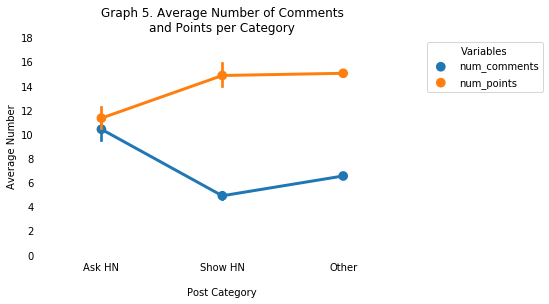

In [17]:
%matplotlib inline

#Use the melt() function to unpivot the dataframe and 
#set the columns 'num_comments' and 'num_points' as values of a column named 'Variables'
plot_df = new_categorized_df.melt('Category', 
                                  value_vars=['num_comments','num_points'],
                                  var_name='Variables',  
                                  value_name='Count')

plt.figure(figsize=(6.5,4))

ax = sns.pointplot(x='Category', 
                   y='Count',
                   hue='Variables',
                   data=plot_df,scale=1.1)
sns.despine(left=True,bottom=True)
ax.axes.set_ylim(0,18)
ax.xaxis.set_ticks_position('none') #Remove x axis ticks
ax.yaxis.set_ticks_position('none') #Remove y axis ticks
ax.set(xlabel='Post Category',ylabel='Average Number')
ax.xaxis.labelpad = 15 #Move the x axis label downward
ax.set_title(GraphTitle('Average Number of Comments\nand Points per Category').getTitle())
ax.legend(bbox_to_anchor=(1.05, 1),loc='best',title='Variables') #Move legend outside
plt.show()

Graph 5 above shows that other posts don't receive a considerable amount of comments in average, but they do get slightly more points than the Show HN category and much more points than the Ask HN category.

## Conclusion

Hacker News is a website where tech and startup stories are shared. As any other posting service, it enables the interaction among its users. The stories that get the most engagement (number of comments/points) aquire more visibility hence giving more attention to the author of the post. This small project was able to establish three things:
- What types of posts are found in Hacker News.com.
- The average number of comments for each type of post.
- The time of day in which a post is created may have incidence in the amount of points and comments it receives.
